# Pollution Processing

Using file download: http://iot.ee.surrey.ac.uk:8080/datasets/pollution/citypulse_pollution_csv_data_aarhus_aug_oct_2014.tar.gz

In [3]:
import tarfile
import pandas as pd
import os
import json
import requests
from pathlib import Path
import matplotlib.pyplot as plt
import zipfile
from typing import List
from io import BytesIO

In [4]:
# Download tar file
response = requests.get('http://iot.ee.surrey.ac.uk:8080/datasets/pollution/citypulse_pollution_csv_data_aarhus_aug_oct_2014.tar.gz')
pollution_df = pd.DataFrame()


In [5]:
with tarfile.open(fileobj=BytesIO(response.content), mode='r:gz') as tar:
    pollution_df = pd.concat([pd.read_csv(tar.extractfile(file))
                        for file in tar.getnames()])

pollution_df.head()

,ozone,particullate_matter,carbon_monoxide,sulfure_dioxide,nitrogen_dioxide,longitude,latitude,timestamp
0,101,94,49,44,87,10.104986,56.231721,2014-08-01 00:05:00
1,106,97,48,47,86,10.104986,56.231721,2014-08-01 00:10:00
2,107,95,49,42,85,10.104986,56.231721,2014-08-01 00:15:00
3,103,90,51,44,87,10.104986,56.231721,2014-08-01 00:20:00
4,105,94,49,39,82,10.104986,56.231721,2014-08-01 00:25:00


In [6]:
print("Pollution Date Range:", pollution_df.timestamp.min(), "-", pollution_df.timestamp.max())
pollution_df.describe()

Pollution Date Range: 2014-08-01 00:05:00 - 2014-10-01 00:00:00


,ozone,particullate_matter,carbon_monoxide,sulfure_dioxide,nitrogen_dioxide,longitude,latitude
count,7.887974e+06,7.887974e+06,7.887974e+06,7.887974e+06,7.887974e+06,7.887974e+06,7.887974e+06
mean,1.127617e+02,1.120929e+02,1.124168e+02,1.119433e+02,1.117035e+02,1.017639e+01,5.616350e+01
std,5.442618e+01,5.483050e+01,5.458531e+01,5.463048e+01,5.489846e+01,4.339946e-02,3.395650e-02
min,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.006279e+01,5.598803e+01
25%,6.600000e+01,6.400000e+01,6.500000e+01,6.500000e+01,6.400000e+01,1.014969e+01,5.613960e+01
50%,1.120000e+02,1.100000e+02,1.110000e+02,1.100000e+02,1.100000e+02,1.018006e+01,5.616397e+01
75%,1.590000e+02,1.590000e+02,1.590000e+02,1.590000e+02,1.590000e+02,1.020442e+01,5.618461e+01
max,2.150000e+02,2.150000e+02,2.150000e+02,2.150000e+02,2.150000e+02,1.030367e+01,5.625626e+01


ozone                  0
particullate_matter    0
carbon_monoxide        0
sulfure_dioxide        0
nitrogen_dioxide       0
longitude              0
latitude               0
timestamp              0
dtype: int64


,ozone,particullate_matter,carbon_monoxide,sulfure_dioxide,nitrogen_dioxide,longitude,latitude
count,17568.0,17568.0,17568.0,17568.0,17568.0,17568.0,17568.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0


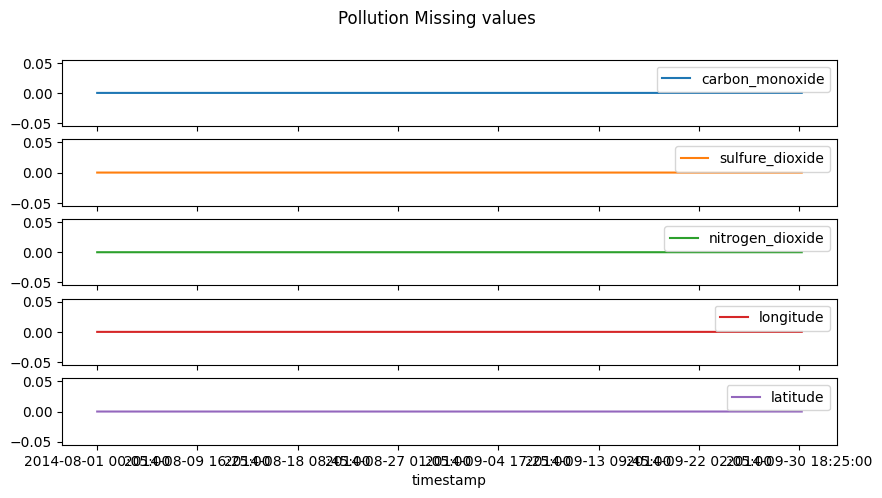

In [8]:
print(pollution_df.isna().sum())
# Visualizing Missing files
missing_data = pollution_df.drop('timestamp', axis = 1).isna().groupby(pollution_df.timestamp, sort = False).sum().reset_index()
missing_data.plot(x='timestamp', 
                title="Pollution Missing values",
                y=pollution_df.columns[2:-1], 
                subplots=True,
                figsize=(10,5))

missing_data.describe()

In [10]:
pollution_df.to_csv("../data/aarhus_pollution_data_aug_oct_2014.csv")
